In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# generate all matrices and their inverses, since not all matrices can be inverted

In [247]:
np.random.seed(55)
matList = [np.random.randint(0,6, (3,3))]

In [248]:
i = 1
while i < 3501:
  matList.append(np.random.randint(0,6, (3,3)))
  i += 1

In [249]:
len(matList)

3501

In [250]:
invList = []
for x in matList:
    try:
        inverse = np.linalg.inv(x)
        invList.append([x, inverse])
    except np.linalg.LinAlgError:
    # Not invertible. Skip this one.
        pass

In [251]:
len(invList) #the number of matrices that can be inverted

3291

In [252]:
# so we have 1417 out of 1501 matrices

In [253]:
# dont worry about a formula for finding the inverse of a matrix but use 
# linear regression for each element of the inverted matrix as a formula from 
# each element of the original matrix and look for a relationship

In [254]:
#convert to dataframe
df = pd.DataFrame(data=invList)
df.columns = ['original', 'inverse']

In [255]:
for i in [0,1,2]:
    for j in [0,1,2]:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        df['inverse'+str(i)+str(j)] = df.apply(lambda row: row['inverse'][i][j], axis=1)
df

,original,inverse,original00,original01,original02,original10,original11,original12,original20,original21,original22,inverse00,inverse01,inverse02,inverse10,inverse11,inverse12,inverse20,inverse21,inverse22
0,"[[5, 2, 0], [5, 5, 5], [5, 5, 3]]","[[0.3333333333333333, 0.2, -0.3333333333333333...",5,2,0,5,5,5,5,5,3,0.333333,0.200000,-0.333333,-3.333333e-01,-0.500000,0.833333,-0.000000,0.500000,-0.500000
1,"[[1, 0, 3], [5, 5, 4], [0, 1, 5]]","[[0.5833333333333333, 0.08333333333333334, -0....",1,0,3,5,5,4,0,1,5,0.583333,0.083333,-0.416667,-6.944444e-01,0.138889,0.305556,0.138889,-0.027778,0.138889
2,"[[0, 3, 2], [5, 5, 3], [0, 3, 5]]","[[-0.35555555555555546, 0.2, 0.022222222222222...",0,3,2,5,5,3,0,3,5,-0.355556,0.200000,0.022222,5.555556e-01,0.000000,-0.222222,-0.333333,0.000000,0.333333
3,"[[3, 4, 1], [4, 0, 4], [5, 4, 5]]","[[0.4999999999999999, 0.4999999999999999, -0.4...",3,4,1,4,0,4,5,4,5,0.500000,0.500000,-0.500000,3.469447e-17,-0.312500,0.250000,-0.500000,-0.250000,0.500000
4,"[[5, 4, 1], [2, 5, 1], [5, 0, 2]]","[[0.34482758620689663, -0.27586206896551724, -...",5,4,1,2,5,1,5,0,2,0.344828,-0.275862,-0.034483,3.448276e-02,0.172414,-0.103448,-0.862069,0.689655,0.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,"[[1, 1, 5], [1, 0, 0], [0, 4, 5]]","[[0.0, 1.0, 0.0], [-0.3333333333333333, 0.3333...",1,1,5,1,0,0,0,4,5,0.000000,1.000000,0.000000,-3.333333e-01,0.333333,0.333333,0.266667,-0.266667,-0.066667
3287,"[[2, 2, 4], [1, 2, 1], [4, 3, 0]]","[[0.16666666666666669, -0.6666666666666667, 0....",2,2,4,1,2,1,4,3,0,0.166667,-0.666667,0.333333,-2.222222e-01,0.888889,-0.111111,0.277778,-0.111111,-0.111111
3288,"[[0, 0, 4], [3, 5, 0], [2, 5, 2]]","[[0.49999999999999983, 0.9999999999999999, -0....",0,0,4,3,5,0,2,5,2,0.500000,1.000000,-1.000000,-3.000000e-01,-0.400000,0.600000,0.250000,0.000000,0.000000
3289,"[[1, 2, 3], [1, 1, 4], [3, 0, 5]]","[[0.5, -1.0, 0.5], [0.7000000000000001, -0.4, ...",1,2,3,1,1,4,3,0,5,0.500000,-1.000000,0.500000,7.000000e-01,-0.400000,-0.100000,-0.300000,0.600000,-0.100000


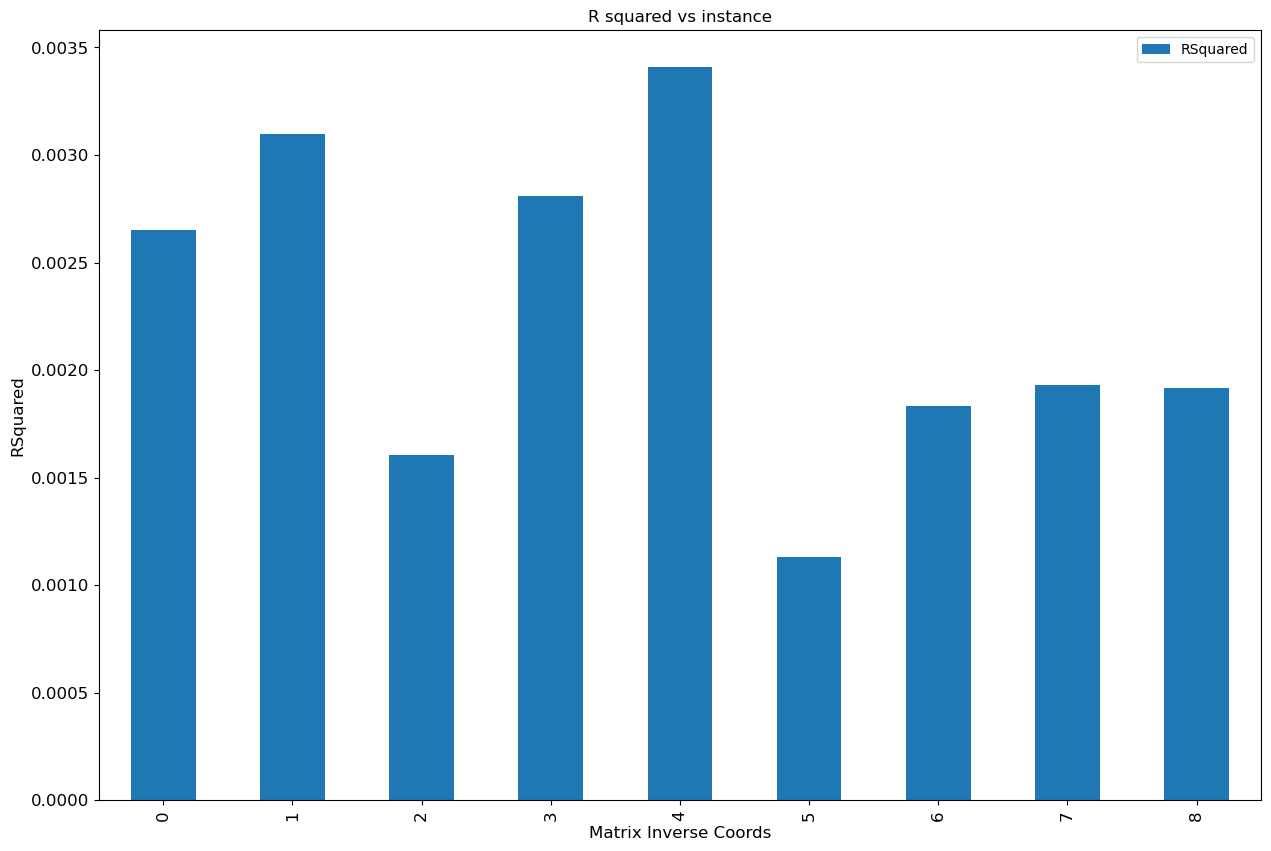

0.00226486249860442

In [256]:
import statsmodels.api as sm

coords = []
fit = []

dflm = df.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dflm = df.copy()
        y = dflm['inverse'+str(i)+str(j)]
        dflm.drop('original', axis=1, inplace=True)
        dflm.drop('inverse', axis=1, inplace=True)
        dflm.drop('inverse00', axis=1, inplace=True)
        dflm.drop('inverse01', axis=1, inplace=True)
        dflm.drop('inverse02', axis=1, inplace=True)
        dflm.drop('inverse10', axis=1, inplace=True)
        dflm.drop('inverse11', axis=1, inplace=True)
        dflm.drop('inverse12', axis=1, inplace=True)
        dflm.drop('inverse20', axis=1, inplace=True)
        dflm.drop('inverse21', axis=1, inplace=True)
        dflm.drop('inverse22', axis=1, inplace=True)
        X = dflm[dflm.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [257]:
#the first corner of the inverse matrix does not have a linear relationship with other components

In [258]:
df = pd.DataFrame(data=invList)
df.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        df['inverse'+str(i)+str(j)] = df.apply(lambda row: row['inverse'][i][j], axis=1)

dflm = df.copy()
y = dflm['inverse01']
dflm.drop('inverse00', axis=1, inplace=True)
dflm.drop('inverse01', axis=1, inplace=True)
dflm.drop('inverse02', axis=1, inplace=True)
dflm.drop('inverse10', axis=1, inplace=True)
dflm.drop('inverse11', axis=1, inplace=True)
dflm.drop('inverse12', axis=1, inplace=True)
dflm.drop('inverse20', axis=1, inplace=True)
dflm.drop('inverse21', axis=1, inplace=True)
dflm.drop('inverse22', axis=1, inplace=True)
dflm.drop('original', axis=1, inplace=True)
dflm.drop('inverse', axis=1, inplace=True)
X = dflm[dflm.columns]
X_withconstant = X
lm_00 = sm.OLS(y,X_withconstant)
lm_00_results = lm_00.fit()
lm_00_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              inverse01   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.134
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                       0.335
Time:                        01:51:44   Log-Likelihood:                     -1.2243e+05
No. Observations:                3291   AIC:                                  2.449e+05
Df Residuals:                    3282   BIC:                                  2.449e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
original00 -2.254e+13   3.38e+13     -0.667      0.505   -8.88e+13    4.37e+13
original01 -1.562e+13   3.35e+13     -0.466      0.641   -8.14e+13    5.01e+13
original02 -2.962e+13   3.35e+13     -0.884      0.377   -9.53e+13     3.6e+13
original10 -3.194e+13   3.39e+13     -0.943      0.346   -9.83e+13    3.44e+13
original11  -2.22e+12   3.38e+13     -0.066      0.948   -6.85e+13    6.41e+13
original12 -3.018e+13    3.3e+13     -0.915      0.360   -9.49e+13    3.45e+13
original20  7.222e+13   3.36e+13      2.149      0.032    6.33e+12    1.38e+14
original21  6.469e+13   3.33e+13      1.942      0.052   -6.21e+11     1.3e+14
original22 -7.827e+12   3.41e+13     -0.230      0.818   -7.47e+13     5.9e+13
==============================================================================
Omnibus:                     4852.893   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277864342.779
Skew:                           7.126   Prob(JB):                         0.00
Kurtosis:                    1426.431   Cond. No.                         4.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
# inverse 1 0 coefficients for linear regression are quite unreasonable

In [260]:
# consider linear combinations of multipying all combinations of two items

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
dflm = dflm.drop('original00x00', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
dflm = dflm.drop('original01x01', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
dflm = dflm.drop('original02x02', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
dflm = dflm.drop('original10x10', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
dflm = dflm.drop('original11x11', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
dflm = dflm.drop('original12x12', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
dflm = dflm.drop('original20x20', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
dflm = dflm.drop('original21x21', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
dflm = dflm.drop('original22x22', axis=1)
  

In [261]:
dflm

,original,inverse,original00,original01,original02,original10,original11,original12,original20,original21,...,original21x20,original21x22,original22x00,original22x01,original22x02,original22x10,original22x11,original22x12,original22x20,original22x21
0,"[[5, 2, 0], [5, 5, 5], [5, 5, 3]]","[[0.3333333333333333, 0.2, -0.3333333333333333...",5,2,0,5,5,5,5,5,...,25,15,15,6,0,15,15,15,15,15
1,"[[1, 0, 3], [5, 5, 4], [0, 1, 5]]","[[0.5833333333333333, 0.08333333333333334, -0....",1,0,3,5,5,4,0,1,...,0,5,5,0,15,25,25,20,0,5
2,"[[0, 3, 2], [5, 5, 3], [0, 3, 5]]","[[-0.35555555555555546, 0.2, 0.022222222222222...",0,3,2,5,5,3,0,3,...,0,15,0,15,10,25,25,15,0,15
3,"[[3, 4, 1], [4, 0, 4], [5, 4, 5]]","[[0.4999999999999999, 0.4999999999999999, -0.4...",3,4,1,4,0,4,5,4,...,20,20,15,20,5,20,0,20,25,20
4,"[[5, 4, 1], [2, 5, 1], [5, 0, 2]]","[[0.34482758620689663, -0.27586206896551724, -...",5,4,1,2,5,1,5,0,...,0,0,10,8,2,4,10,2,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,"[[1, 1, 5], [1, 0, 0], [0, 4, 5]]","[[0.0, 1.0, 0.0], [-0.3333333333333333, 0.3333...",1,1,5,1,0,0,0,4,...,0,20,5,5,25,5,0,0,0,20
3287,"[[2, 2, 4], [1, 2, 1], [4, 3, 0]]","[[0.16666666666666669, -0.6666666666666667, 0....",2,2,4,1,2,1,4,3,...,12,0,0,0,0,0,0,0,0,0
3288,"[[0, 0, 4], [3, 5, 0], [2, 5, 2]]","[[0.49999999999999983, 0.9999999999999999, -0....",0,0,4,3,5,0,2,5,...,10,10,0,0,8,6,10,0,4,10
3289,"[[1, 2, 3], [1, 1, 4], [3, 0, 5]]","[[0.5, -1.0, 0.5], [0.7000000000000001, -0.4, ...",1,2,3,1,1,4,3,0,...,0,0,5,10,15,5,5,20,15,0


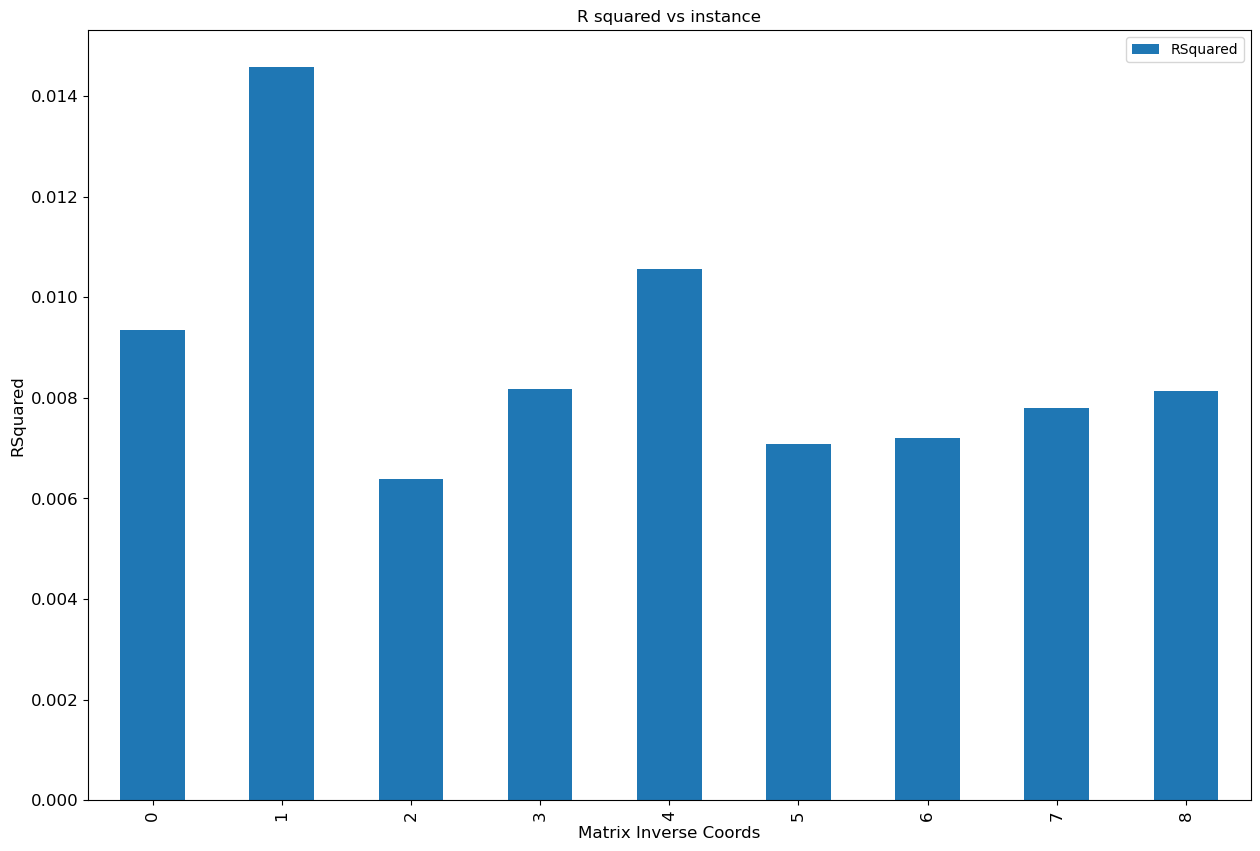

0.00880777532480174

In [262]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [263]:
# when adding the combinations of multiplication of two matrix elements to the linear regression the average r squared value 
# increases from 0.0039 to 0.016 which is quite significant

In [264]:
# unfortunately the average r sqaured value is way to low to be able to determine the inverse of a matrix by linear regression

In [265]:
# this is expected although it is a neat result to see how the average r sqaured value significantly increased by adding the 
# combinations of multiplying two matrix elements

In [266]:
# consider linear combinations of multipying all combinations of two items, along with the square of each element in the matrix

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
  

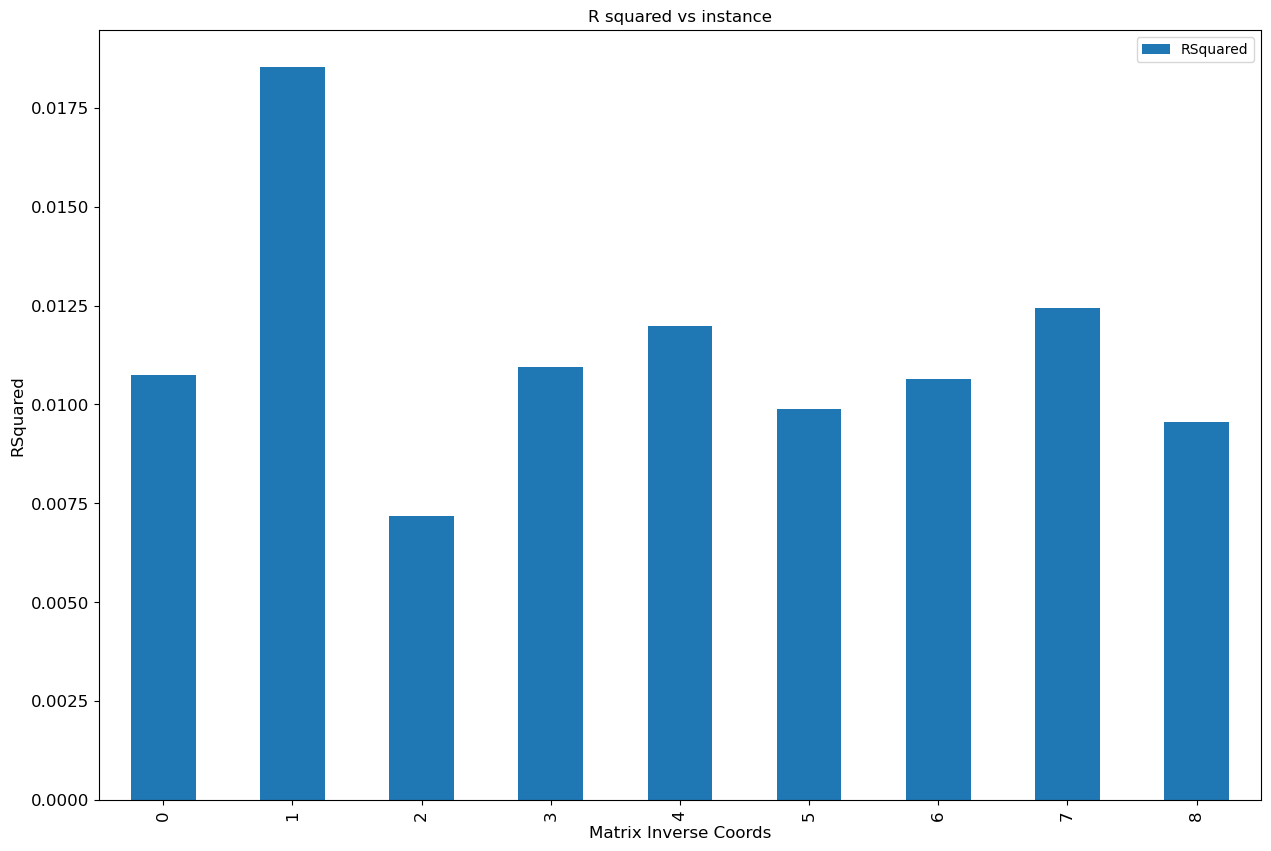

0.011322381229610748

In [267]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [268]:
#very interesting, the average r squared value increases by 6% when the square of each element to the linear regression

In [269]:
# consider linear combinations of multipying all combinations of two items, along with the square of each element in the matrix

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0] * row['original'][0][0] , axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1] * row['original'][0][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2] * row['original'][0][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0] * row['original'][1][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1] * row['original'][1][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2] * row['original'][1][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0] * row['original'][2][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1] * row['original'][2][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2] * row['original'][1][2], axis=1)
  

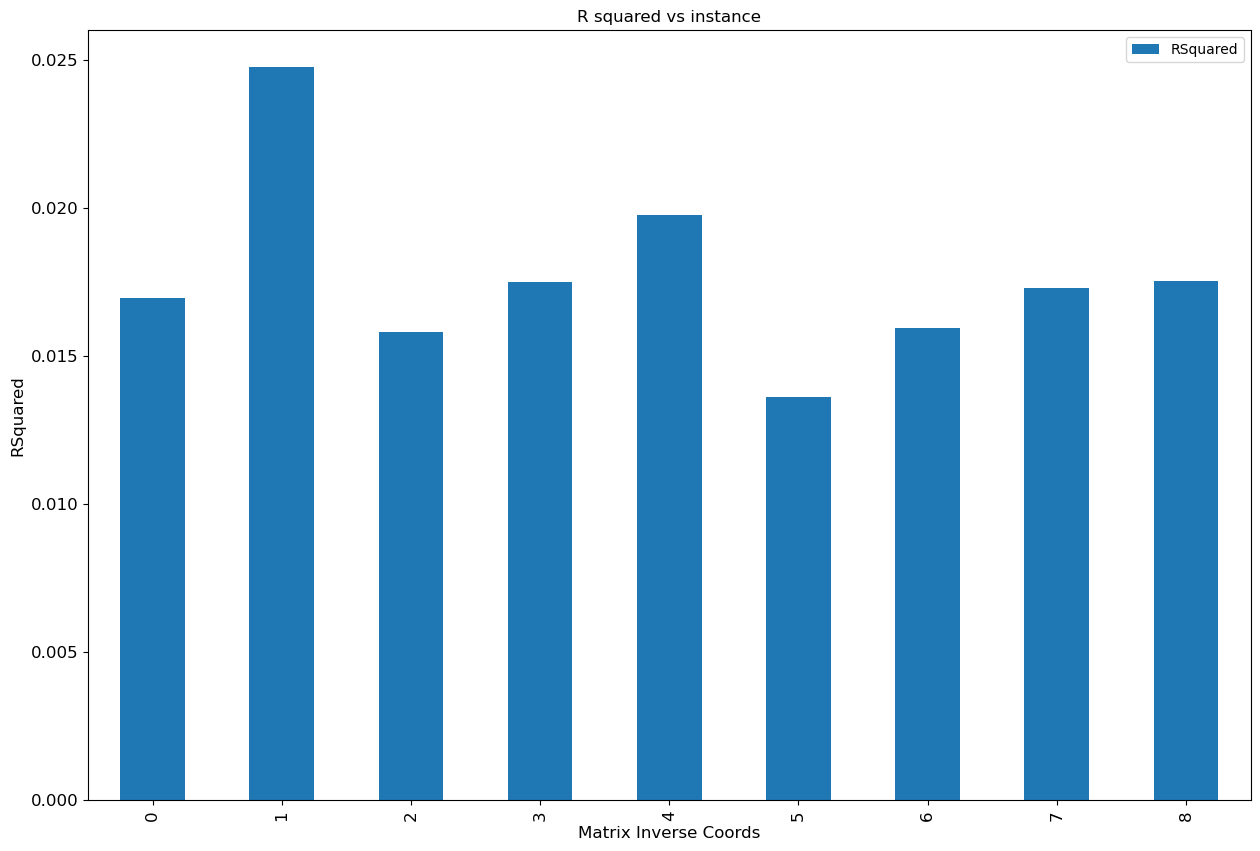

0.01769741953057513

In [270]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()